## Optiver Quantitative Researcher Challenge

An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

- If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?
- What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?
- Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an *ellipse* (the word 'ellipse' was omitted in challenge description) defined by $\biggl(\frac{x – 2.5}{30}\biggr)^2 + \biggl(\frac{y – 2.5}{40}\biggr)^2 < 1$ in a coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.

### Introduction

This demands a 'random walk' scenario. This is a stochastic process describing a path through some mathematical space (in 1D or higher dimensions) where each step has a certain probability of being in any particular direction. Mathematically, this process can be described by Markov Chains with absorbing boundaries. I've focused on the computational implementation here.

In this problem, one step may be taken in either the horizontal or vertical direction with equal probability, $p$, such that $p_{+x} = p_{-x} = p_{+y} = p_{-y} = \frac{1}{4}$. The path – corresponding to the position of an ant – continues until it intersects with any of a selection of boundaries,
- rectangular 
- linear 
- elliptical,

which denote the position of food.

### Notebook Description

My solution provides coded examples of random walks for the scenarios demanded by the challenge. In addition, user-inputted boundaries, and any hand-drawn boundary (from a png file) are possible. 

#### Presentation of solutions
The required values – determined using the subsequent code – are tabulated and example illustrated below in case you don't fancy scrolling through the method!

| Scenario | Average Time (s)  |
|---|---|
| 1D Walk, $\pm$20cm boundary | 4.0  |
| Square, 20cm half-width  | 4.5  |  
| Line, $y=10-x$ | n/a – see below discussion|   
| Ellipse, equation in challenge question |  14 | 

#### Definition of functions:

The necessary functions are defined as follows:
- Import necessary libraries/methods
- Define functions to check validity of user inputs
- Define 1D random walk functions
- Define general functions for carrying out 2D random walks
- Define random walk functions with a **rectangular** boundary
- Define random walk functions for a **linear** boundary
- Define random walk functions for **elliptical** boundaries
- Define plotting functions for all 2D random walks and their corresponding boundaries
- Define timing functions:
    - Timing a single random walk
    - Timing multiple random walks and taking an average
    - Plotting the convergence of random walk timings to an average value

#### Execution of functions:
The following functionalities are then demonstrated for each boundary type:
- Average time taken for the default boundary calculated and returned
- Single random walk within default boundary (as defined in question) plotted, and time taken displayed
- User input demanded, and single walk executed
- Multiple repeats of user-inputted boundary carried out, average time returned, and convergence to an average value calculated


#### Further extensions:
The ability to upload a png file is then offered. A single example walk is illustrated and the corresponding time to reach the boundary calculated.

### Results are discussed throughout the notebook

In [1]:
# =============================================================================
# IMPORT NECESSARY MODULES
# =============================================================================
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.image as mpimg
import sys
from distutils.util import strtobool
import matplotlib.animation as animation
import math
import PIL

### Custom Image Searching

In [2]:
# =============================================================================
# LOADING BAR
# =============================================================================

def ticker(i,final_i):
    '''Produces loading bar with percentage counter.'''
    
    wheel = ['-','/','|','\\','-']          # different ticker orientations
    perc = (((i)/final_i)*100)              # calculates percent to nearest integer
    stars = ' *' * int(((perc+1)//10))      # determines no. of stars
    dashes = ' -' * (10-(len(stars)//2))    # determines no. of dashes
    index_1 = int(i % 5)                    # allows wheels to rotate with opposite orientations
    index_2 = 4-index_1
    # Fancy loading formatting! Replaces readout continuously
    sys.stdout.write('\r '+stars+dashes+'    '+wheel[index_2]+'  '\
                     +str(round(perc))+'%'+'  '+wheel[index_1]+'    '+dashes+stars)

### Input Checking Functions

These are included to ensure that the correct input types (floats, integers, etc.) are provided when requested by the user-defined boundary functions.

In [3]:
# =============================================================================
# INPUT CHECKING FUNCTIONS
# =============================================================================

def yesno(userinput):
    '''Demands a yes/no response from user and stops at nothing to get it.'''
    
    while True: # while function called
        try:
            return strtobool(input(userinput).lower())
        except ValueError:
            print('Please answer with ''yes'' or ''no''.')
            
            
def posint(userinput):
    '''Ensures user input is a positive integer.'''
    
    # while function is called
    while True:
        # if this block is true
        try:
            tocheck = int(input(userinput))
            # checking that number is positive
            if tocheck <= 0:    
                print('This number is not positive.')
                continue
        # if not, return this, and call input request again
        except ValueError:
            print('Your response was not an integer.')
        # when correct, return value and exit function
        else:
            return tocheck
        
        
def integer(userinput):
    '''Ensures user input is an integer.'''
    
    # while function is called
    while True:
        # if this block is true
        try:
            tocheck = int(input(userinput))
            # checking that snumber is positive
        # if not, return this, and call input request again
        except ValueError:
            print('Your response was not an integer.')
        # when correct, return value and exit function
        else:
            return tocheck
        
        
def flt(userinput):
    '''Ensures user input is a floating point number.'''
    
    while True: # while function called, if this block is true
        try:
            tocheck = float(input(userinput))
        except ValueError:  # if not, return this, and call input request again
            print('That is not a floating point number.')
        else:   # when correct, return value and exit function
            return tocheck 
        
        
def posflt(userinput):
    '''Ensures user input is a floating point number.'''
    
    while True: # while function called, if this block is true
        try:
            tocheck = float(input(userinput))
            # checking that number is positive
            if tocheck <= 0:    
                print('This number is not positive.')
                continue
        # if not, return this, and call input request again
        except ValueError:  
            print('That is not a floating point number.')
        else:   # when correct, return value and exit function
            return tocheck 

### 1D Random Walk

My first approach to the problem was to implement the simplest possible random walk. This served as a proof of concept of the computational method, and ensured understanding of the basics. It also allowed the confirmation of a mathematical solution which I computed using Excel.

#### Mathematical Solution using Excel

This was an original brute-force method involving listing successively more complex possible paths for an ant moving from the origin on a 1D line, bounded by limits of -20 and 20. Step size and step speed were the same as in the challenge question: 10 arbitrary units (a.u.) and 10 a.u./s respectively.

- The probability of a particular path being taken decreased with the number of steps in the path. Each step had a probability of $\frac{1}{2}$ such that for a path length $n$ the corresponding probability was $(\frac{1}{2})^n$.
- It was only necessary to list paths starting with a step in the positive direction, since the probability of the identical path beginning with a step in the negative direction is the same. This saved considerable amounts of time.
- The weighted average time, $W$, of all possible paths was computed using

$$W = \frac{\Sigma^n_{i=1} w_i X_i}{\Sigma^n_{i=1} w_i}$$

where $n$ is the total number of paths, $i$ refers to a single path, $w_i$ is the probability of that path being taken, and $X_i$ is the time that path would take.
- Paths increased in complexity by adding a further pair of steps each time.
- The number of successively-complex paths increased in length with the $2^x$ geometric series, where $x$ is the order of complexity: $x=1$ denotes path length 2, $x=2$ denotes path length 4, etc. This allowed the extension of possible path lengths without having to list the steps themselves, and produced the following graph:

<img src=Excel_Ant_Food.png width="600">


The long-run average of $4.0s$ for the ant to reach food was validified in code executed below, before more complex scenarios were investigated using the same methods.

In [4]:
def randomWalk1D(step_size=10,lower_bound=-20,upper_bound=20):
    '''Plots an unbounded random walk in 1D'''
    
    # possible step in either direction
    step_set = [-step_size,step_size]
    # set initial position at origin
    pos = [0]
    
    # while ant within boundaries
    while pos[-1]>lower_bound and pos[-1]<upper_bound:
        # make a random step
        move = np.random.choice(step_set)
        pos.append(pos[-1]+move)
    
    # calculate the path length beyond the boundary to deterine path length within boundary
    if pos[-1] <= lower_bound:
        remainder = lower_bound - pos[-1]
    elif pos[-1] >= upper_bound:
        remainder = pos[-1] - upper_bound
        
    return pos,remainder


# resize plots
plt.rcParams['figure.figsize'] = [10, 10]

def plot1D(pos):
    '''Plots the random walk in 1D'''
    
    plt.plot(pos,c='r')
    # format graph
    plt.xlabel('Step number')
    plt.ylabel('Value')
    plt.title('Random Walk in 1D')
    plt.plot(0,pos[0],marker='o',c='b')              # plot marker at beginning...
    plt.plot(len(pos)-1,pos[-1],marker='X',c='b')    # ...and end of path

In [5]:
# =============================================================================
# 2D WALK FUNCTIONS
# =============================================================================

def step2D(pos,step_size=10):
    '''Take a single random step in N, E, S, or W direction'''
    
    step_set = [-step_size,step_size]
    direct = ['horizontal','vertical']
    # choose a step in a random direction
    move = np.random.choice(step_set)
    direction = np.random.choice(direct)
    
    if direction =='horizontal':    # if horizontal, change x co-ordinate
        pos.append([sum(x) for x in zip((pos[-1]),(move,0))])
    elif direction == 'vertical':   # if vertical, change y co-ordinate
        pos.append([sum(y) for y in zip((pos[-1]),(0,move))])
    
    return pos,direction


def slicingOrder(val_1,val_2):
    '''Arranges values in ascending order for correct slicing/Boolean expressions. 
    Returns values as low, high. Doesn't matter if values are the same'''
    
    if val_1 < val_2:
        return val_1, val_2
    elif val_1 > val_2:
        return val_2, val_1
    

def sqrRoot(num):
    '''Returns both positive and negative roots of num. Necessary to find 
    correct point on ellipse'''
    
    positive = np.sqrt(num)
    negative = -positive
    return [positive,negative]

### Rectangle Functions

The most basic demand of the challenge is to compute the average time taken by an ant at the centre of a square to reach food which lies along and beyond the edges. The following functions allow any square or rectangle to be defined, after which a random walk is carried out commencing from an arbitrary origin within the quadrilateral, `(0,0)`, until the path intersects with the boundary. This intersection is computed by checking that each new ant position does not lie on, or outside of, the edges of the quadrilateral. 

#### Function notes
- A single function, `ellipseRectInputting`, gathers the user inputs for both the user-defined quadrilaterals and ellipses, since they share the same parameters: `width`, `height`, and centre coordinates.
- The starting coordinates being fixed at the origin reflect the challenge statement and is not limiting, since the centre of the quadrilateral can be changed.
- The amount of path lying outside the boundary, `remainder`, is computed. It is later subtracted from the total path distance to calculate only the distance (and therefore the time) required to reach the boundary. 
- Depending on the size of the user-inputted boundary, the ant can take a large number of steps before the boundary is reached. Excessively-long routes are prevented by a `while` loop execution counter which abandons paths after `max_N` steps.

In [6]:
# RECTANGLE FUNCTIONS

def ellipseRectInputting(x_cent=2.5,y_cent=2.5,half_width=30,half_height=40,step_size=10):
    '''Takes user input for elliptical and rectangular boundaries. Ant starts at (0,0)'''

    half_width = posflt('Enter half width, a: ')
    half_height = posflt('Enter half height, b: ')
    
    x_cent = flt('Enter x center: ')    
    while any([x_cent-half_width>0, x_cent+half_width<0]):   #  ensures ant starts within/on boundary
        print('Ant starting outside of boundary.')
        x_cent = flt('Enter x center: ')
        
    y_cent = flt('Enter y center: ')
    while any([y_cent-half_height>0, y_cent+half_height<0]):
        print('Ant starting outside of boundary.')
        y_cent = flt('Enter y center: ')
        
    step_size = posflt('Enter step size: ')
    
    return x_cent,y_cent,half_width,half_height,step_size


def rectWalk(step_size=10,x_cent=0,y_cent=0,half_width=20,half_height=20,max_N=1e6):
    '''Carry out random walk for any rectangular boundary'''
    
    # calculate boundary coordinates
    right = x_cent+half_width
    left = x_cent-half_width
    top = y_cent+half_height
    bottom = y_cent-half_height
    
    pos = [[x_cent,y_cent]]
    x_val = pos[0][0]
    y_val = pos[0][1]
    
    tick = 0        # initialise counter to prevent excessively-long paths 
    while all([x_val<right, x_val>left, y_val>bottom, y_val<top, tick<max_N]):
        tick +=1    # another step, another tick
        
        # take a random step and update the list of position coordinates
        pos,direction = step2D(pos,step_size)
        x_val = pos[-1][0]
        y_val = pos[-1][1]
    
    # check that ant has not left – or landed on – the boundary
    if x_val >= right:
        remainder = abs(x_val-right)    # calculate proportion of final step
    elif x_val <= left:                 # required to reach the boundary
        remainder = abs(left-x_val)
    elif y_val >= top:
        remainder = abs(y_val-top)
    elif y_val <= bottom:
        remainder = abs(bottom-y_val)
    else:
        print('\nSilly ant! Took too long (more than {} steps) to converge to food.'.format(int(max_N)))
    
    return pos, remainder

### Line Functions

Rather than checking whether the path exits a shape, a linear boundary problem requires us to find the intersection between the boundary and the path. This is accomplished by checking for whether two successive path coordinates sandwich the corresponding point on the boundary.

#### Function Notes
- `lineWalk` uses a first-degree polynomial fitting function to calculate the equation of any line from two points. I have not increased the robustness of this `numpy` function, which may occassionally fail to fit more extreme lines, since it's not the main focus of the challenge! A fun future extension, perhaps...
- These functions could also be easily generalised to allow higher-order curves such as quadratics through the provision of a third point along any curve.
- The remainder (the amount by which the path oversteps the boundary) is later subtracted from the total path distance to calculate only the distance (and therefore the time) required to reach the boundary.
- `lineInputting` asks for the ant's starting position to allow any line to be crossed from either side.

In [7]:
# LINE FUNCTIONS

def lineInputting():
    '''Takes user input for line boundary'''
    
    point_1_x = flt('Enter x coordinate of first point on line: ')    
    point_1_y = flt('Enter y coordinate of first point on line: ') 
    point_2_x = flt('Enter x coordinate of second point on line: ')    
    point_2_y = flt('Enter y coordinate of second point on line: ') 
    point_1 = [point_1_x,point_1_y]
    point_2 = [point_2_x,point_2_y]
    
    origin_x = flt('Enter x value of ant origin: ') 
    origin_y = flt('Enter y value of ant origin: ') 
    
    return point_1,point_2,origin_x,origin_y


def lineWalk(point_1=[10,0],point_2=[0,10],origin_x=0,origin_y=0,max_N=1e6):
    '''Carry out random walk for any line of food'''
    
    pos = [[origin_x,origin_y]]
    xs = [point_1[0],point_2[0]]
    ys = [point_1[1],point_2[1]]
    m,c = np.polyfit(xs,ys,1)
    
    tick = 0    # initialise to avoid excessive path lengths
    check = 0   # initialise to indicate path-line intersection
    remainder = 0

    while check == 0 and tick <= max_N:
        tick += 1
        
        x_start = pos[-1][0]        # step start co-ordinates
        y_start = pos[-1][1]
        pos,direction = step2D(pos) # take step
        x_end = pos[-1][0]          # step end co-ordinates    
        y_end = pos[-1][1]
        
        if direction == 'horizontal' and m != 0:        # horizontal step and non-horizontal boundary
            x_line = (y_end - c) / m                    # calculate the x value of line for final ant y value
            x_low,x_high = slicingOrder(x_start,x_end)
            if x_low <= x_line and x_high >= x_line:    # if path and line intersect...
                check = 1                               # ...stop path execution
                remainder = abs(x_line-x_end)
                
        elif direction == 'vertical':
            y_line = m*x_end + c                        # calculate the y value of line for final ant x value
            y_low,y_high = slicingOrder(y_start,y_end)
            if y_low <= y_line and y_high >= y_line:    # if path and line intersect...
                check = 1                               # ...stop path execution
                remainder = abs(y_line-y_end)
        
    if tick > max_N:
        print('\nSilly ant! Took too long (more than {} steps) to converge to food.'.format(int(max_N)))
        
    return pos,remainder 

### Ellipse Functions

These combine the methods of the quadrilateral and line functions to check when the ant position exceeds the limits of the elliptical boundary. For each step, the coordinates of the ellipse is calculated for that direction of motion (similar to the linear function). The final coordinate of the ant is then compared to this value, ensuring that it lies within the ellipse (similar to the rectangular function).

#### Function information
- The question indicates the boundary denotes the start of a field of food. The input function therefore demands that the ant start within or on the boundary to avoid trivial paths.
- The symmetry of the ellipse results in each $x$ coordinate having either one or two corresponding $y$ coordinates. The correct $y$ coordinate is determined by `ellipseCalc` which takes into account the direction of the final step, and the side of the ellipse on which the corresponding path coordinate lies.
- The equation of an ellipse requires a square root to be calculated. By default `numpy` returns the positive square root. However, depending on which side of the ellipse is being crossed, the negative square root may be necessary. The correctly-signed square root is handled by the custom `sqrRoot` function in conjunction with `ellipseCalc`.

In [8]:
# ELLIPSE FUNCTIONS

def ellipseCalc(direction,x_val,y_val,x_cent=2.5,y_cent=2.5,half_width=30,half_height=40):
    '''Calculates ellipse edge values for any set of input parameters'''
    
    if direction == 'horizontal':
        in_root_x = 1 - ((y_val-y_cent)/half_height)**2  # calculation of term within square root
                    
        if x_val >= x_cent: # calculate correctly-signed square root
            root = sqrRoot(in_root_x)[0]
        else:
            root = sqrRoot(in_root_x)[1]
        ell_val = half_width*root + x_cent
    
    elif direction == 'vertical':
        in_root_y = 1 - ((x_val-x_cent)/half_width)**2
                    
        if y_val >= y_cent: # calculate correctly-signed square root
            root = sqrRoot(in_root_y)[0]
        else:
            root = sqrRoot(in_root_y)[1]
        ell_val = half_height*root + y_cent
    
    return ell_val


def ellipseWalk(step_size=10,x_cent=2.5,y_cent=2.5,half_width=30,half_height=40,max_N=1e6):
    '''Carry out random walk for any ellipse'''
    
    pos = [[x_cent,y_cent]]
    # calculate left hand side of ellipse equation
    lhs = ((pos[0][0]-x_cent)/half_width)**2 + ((pos[0][1]-y_cent)/half_height)**2
    
    remainder = 0
    tick = 0
    # repeat steps until value on left hand side exceeds right hand side (ant position outside ellipse)
    while lhs <= 1 and tick < max_N:   
        tick +=1    # another step, another tick
        
        pos,direction = step2D(pos)
        x_val = pos[-1][0]
        y_val = pos[-1][1]
        lhs = ((x_val-x_cent)/half_width)**2 + ((y_val-y_cent)/half_height)**2
        
        if direction == 'horizontal':   # if final step was horizontal
            # calculate ellipse x value
            ell_val = ellipseCalc(direction,x_val,y_val,x_cent,y_cent,half_width,half_height)
            remainder = abs(x_val-ell_val)
                    
        elif direction == 'vertical':   # if final step was vertical
            # calculate ellipse x value    
            ell_val = ellipseCalc(direction,x_val,y_val,x_cent,y_cent,half_width,half_height)
            remainder = abs(y_val-ell_val)
        
    if tick >= max_N:
        print('\nSilly ant! Took too long (more than {} steps) to converge to food.'.format(int(max_N)))
                
    return pos,remainder

### Plotting Functions

Each random walk is plotted on a formatted figure by `plotRandomWalk`, and the corresponding boundary and equation added to the existing figure by specific functions, `plotRect`, `plotLine`, or `plotEllipse`.

#### Function information
- In `plotLine` the correct length of line is plotted by extracting the minimum and maximum $x$ coordinates of the path and calculating the corresponding $y$ values of the line boundary.
- `generateTicks` ensures that the grid is plotted in intervals of 10 for consistency between path displays

In [9]:
# PLOTTING FUNCTIONS

def plotRandomWalk(pos,step_size=10):
    '''Plots path taken by ant'''
    
    # initialise figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # formatting graph
    plt.rcParams['mathtext.fontset'] = 'cm'     # getting nice mathematical notation
    ax.set_xlabel(r'$x$ coordinate')            # labelling axes
    ax.set_ylabel(r'$y$ coordinate')
    ax.set_title('Random Walk in 2D')           # title
    ax.set_aspect('equal',adjustable='box')     # equal axes to get true shapes
    ax.grid(True,which='both',color='k',alpha=0.2)
    
    xs, ys = np.array(pos).T    # quicker to work in arrays than having to unzip list of tuples
    
    # obtain start and end co-ordinates
    start = (xs[0],ys[0])
    end = (xs[-1],ys[-1])
        
    ax.plot(start[0],start[1],marker='o',c='b')     # plot marker at beginning
    ax.plot(end[0],end[1],marker='X',c='b')         # and end of path
    # plot transparent marker at each step along path to show overlapping path segments
    ax.plot(xs,ys,c='r',marker='x',markerfacecolor=(1, 1, 1, 0.5))   


def generateTicks(x_cent,y_cent,half_width,half_height):
    '''Generates an array of ticks for the grid, and x and y limits'''
    
    bottom = y_cent-half_height # calculate extreme values of the boundary
    top = y_cent+half_height
    left = x_cent-half_width
    right = x_cent+half_width
    
    x_low = math.ceil(left*0.1)/0.1   # round down to nearest 10
    x_high = math.ceil(right*0.1)/0.1 # round up to nearest 10
    y_low = math.ceil(bottom*0.1)/0.1
    y_high = math.ceil(top*0.1)/0.1
    
    return bottom,top,left,right,x_low,x_high,y_low,y_high

    
def plotRect(x_cent=0,y_cent=0,half_width=20,half_height=20):
    '''Plots rectangular boundary onto existing figure'''
    
    # generate formatted rectangle information for legend
    equation = 'centre ({},{}), width = {}, height = {}'.format(
        x_cent,y_cent,2*half_width,2*half_height)
    # generate rectangle patch
    rectangle = plt.Rectangle((x_cent-half_width,y_cent-half_height),
                              2*half_width,2*half_height,
                    label=equation,linewidth=5,facecolor='none',ec="k")
    
    bottom,top,left,right,x_low,x_high,y_low,y_high = generateTicks(x_cent,y_cent,half_width,half_height)
    
    # set plotting limits of axes
    plt.xlim(left,right)   
    plt.ylim(bottom,top)
    # set grid line ticks
    plt.xticks(np.arange(x_low,x_high,step_size))
    plt.yticks(np.arange(y_low,y_high,step_size))
    
    plt.gca().add_patch(rectangle)
    plt.legend()
    
    
def plotLine(pos,point_1=[10,0],point_2=[0,10]):
    '''Plots the boundary line onto existing figure'''

    xs = [point_1[0],point_2[0]]
    ys = [point_1[1],point_2[1]]
    m,c = np.polyfit(xs,ys,1)       # uses a first-order polynomial fit to find gradient and intercept
    
    # extracts/calculates minimum and maximum x, y values to plot necessary length of line
    min_x = min(pos,key=lambda t: t[0])[0]
    max_x = max(pos,key=lambda t: t[0])[0]
    min_y = m*min_x + c
    max_y = m*max_x + c
    
    equation = r'$y = {:.1f}x{:+.1f}$'.format(m,c)
    
    if min_x == max_x:  # catches case where a single vertical step is taken, resulting in no line 
        plt.plot(xs,ys,label=equation,linewidth=5,c='k')
    else:
        plt.plot([min_x,max_x],[min_y,max_y],label=equation,linewidth=5,c='k')
    plt.legend()
    

def plotEllipse(x_cent=2.5,y_cent=2.5,half_width=30,half_height=40):
    '''Plots elliptical boundary onto existing figure'''

    # generate formatted ellipse equation for legend
    equation = r'$(\frac{{x-{}}}{{{}}})^2+(\frac{{y-{}}}{{{}}})^2 = 1$'.format(
        x_cent,half_width,y_cent,half_height)
    # generate ellipse patch
    ellipse = Ellipse((x_cent,y_cent), 2*half_width, 2*half_height, angle=0,
                        label=equation,linewidth=5,facecolor='none',ec="k")
    
    bottom,top,left,right,x_low,x_high,y_low,y_high = generateTicks(x_cent,y_cent,half_width,half_height)
    
    # set plotting limits of axes
    plt.xlim(left,right)
    plt.ylim(bottom,top)
    # set grid line ticks
    plt.xticks(np.arange(x_low,x_high,step_size))
    plt.yticks(np.arange(y_low,y_high,step_size))
    
    plt.gca().add_patch(ellipse)
    plt.legend()

### Timing Functions

Each function calculates the total distance travelled – `step_num` $\times$ `step_size` + `remainder` – and divides by `step_speed` to calculate the total time taken to reach the boundary. For the average time, the average of `step_num` and `remainder` are calculated, summed, and divided by `step_speed`. All distances and speeds are given in arbitrary units, which could be $cm$ and $cm/s$ as stated in the challenge statement.

#### Function information
- Number of steps is calculated from the length of `pos`, a list of tuples corresponding to coordinates along the path. The number of steps taken is one fewer than `len(pos)` since the initial coordinate is the origin.
- `avConvergence` shows the convergence to an average time for many repeats of random walks initialised with the same parameters. This is the main demand from the challenge. A final average value is calculated using only the latter half of the running averages, since early values are greatly affected by outliers.

In [10]:
def timeSingleWalk(pos,remainder=0,step_size=10,step_speed=10):
    '''Returns statistics of a single walk'''
    
    step_num = len(pos)-1
    distance = step_num * step_size - remainder
    time = distance / step_speed
    
    print('\n\nExample ant reached boundary in {:.1f}s after taking {} step(s) of size {} unit(s) at a speed of {:.1f} unit(s) per second.'
          .format(time,step_num,step_size,step_speed))

    
def timeManyWalks(pos_array,remainder_array,step_size=10,step_speed=10):
    '''Calculate time from position arrays of many random walks and information about movement'''
    
    step_nums = np.mean(pos_array)
    distance = step_nums * step_size - np.nanmean(remainder_array)
    av_time = distance / step_speed
    
    print('\n\nOn average (of {} repeats), ant reached boundary in {:.5f}s after taking {} step(s) of size {} unit(s) at a speed of {:.1f} unit(s) per second.'
          .format(len(pos_array),av_time,step_nums,step_size,step_speed))
    

def avConvergence(step_size=10,step_speed=10,repeats=10):
    '''Plots the convergence to an average time for each boundary'''
    
    av_times = np.zeros(len(pos_array))
    
    # calculate the average distance and time for successively greater numbers of data points
    for i in range(len(pos_array)):
        av_steps = np.mean(pos_array[:i+1])
        distance = av_steps * step_size + np.nanmean(remainder_array[:i+1])
        av_times[i] = distance / step_speed
    
    # calculates a final average value by disregarding initial averages (law of large numbers)
    fin_average = np.nanmean(av_times[len(av_times)//2:-1])
    print('\n\nFinal average time: {:.5f}s'.format(fin_average))
    
    plt.plot(np.arange(len(pos_array)),fin_average*np.ones(repeats),
             label='Average value: {:.5f}s'.format(fin_average))
    
    # format plot
    plt.plot(np.arange(repeats),av_times)
    plt.xlabel('Repeat Number')
    plt.ylabel('Average Time (s)')
    plt.title('Convergence of paths to an average time')
    plt.legend()    

## End of function definitions | Start of demonstrations

#### Checking the solution computed mathematically above

  * - - - - - - - - -    \  12%  /     - - - - - - - - - *

  * * - - - - - - - -    -  22%  -     - - - - - - - - * *

  * * * - - - - - - -    -  31%  -     - - - - - - - * * *

  * * * * - - - - - -    \  40%  /     - - - - - - * * * *

  * * * * - - - - - -    /  48%  \     - - - - - - * * * *

  * * * * * - - - - -    -  54%  -     - - - - - * * * * *

  * * * * * * - - - -    -  63%  -     - - - - * * * * * *

  * * * * * * * - - -    -  69%  -     - - - * * * * * * *

  * * * * * * * - - -    \  78%  /     - - - * * * * * * *

  * * * * * * * * - -    \  81%  /     - - * * * * * * * *

  * * * * * * * * - -    |  86%  |     - - * * * * * * * *

  * * * * * * * * * -    |  93%  |     - * * * * * * * * *

  * * * * * * * * * -    \  97%  /     - * * * * * * * * *

  * * * * * * * * * *    -  100%  -     * * * * * * * * * *

On average (of 10000 repeats), ant reached boundary in 3.97160s after taking 3.9716 step(s) of size 10 unit(s) at a speed of 10.0 unit(s) per second.




Final average time: 3.97002s


Example ant reached boundary in 4.0s after taking 4 step(s) of size 10 unit(s) at a speed of 10.0 unit(s) per second.


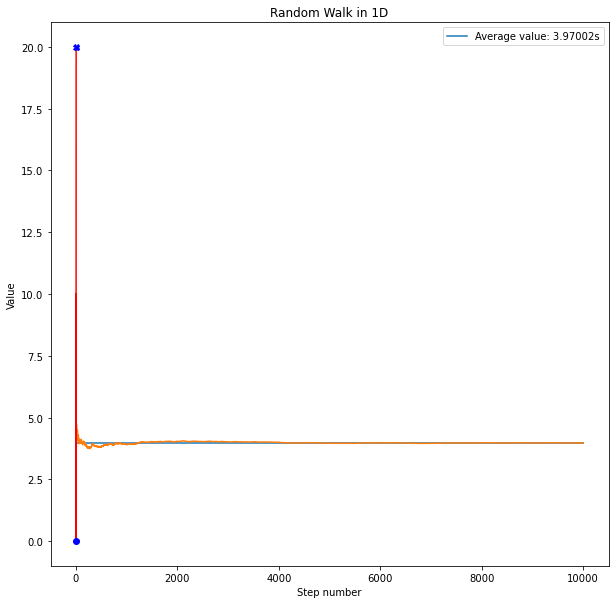

In [11]:
# Initialise variables. Otherwise defaults used.
step_size = 10      # arbitrary units (a.u.) - could be cm as in challenge question
step_speed = 10     # in a.u. per second
lower_bound = -20   # lower limit of walk (food position)
upper_bound = 20    # upper limit of walk (food position)

# Repeating 1D random walk timing (and taking average) for many repeats
repeats = 10000 # number of walks to execute

pos_array = np.zeros(repeats)
remainder_array = np.zeros(repeats)
for i in range(repeats):
    ticker(i,repeats)
    pos_array[i], remainder_array[i] = len(randomWalk1D()[0])-1, randomWalk1D()[1]

# Compute the average time of the repeats
timeManyWalks(pos_array,remainder_array,step_size,step_speed)

# Plot convergence to an average value of path execution time
avConvergence(step_size,step_speed,repeats)

# 1D boundary demonstration
pos,remainder = randomWalk1D(step_size,lower_bound,upper_bound)
timeSingleWalk(pos,remainder,step_size,step_speed)
plot1D(pos)

### Rectangular Boundary – default values

  - - - - - - - - - -    -  3%  -     - - - - - - - - - -

  - - - - - - - - - -    /  5%  \     - - - - - - - - - -

  - - - - - - - - - -    -  9%  -     - - - - - - - - - -

  * - - - - - - - - -    /  10%  \     - - - - - - - - - *

  * - - - - - - - - -    -  13%  -     - - - - - - - - - *

  * - - - - - - - - -    |  17%  |     - - - - - - - - - *

  * * - - - - - - - -    \  22%  /     - - - - - - - - * *

  * * - - - - - - - -    -  26%  -     - - - - - - - - * *

  * * - - - - - - - -    -  29%  -     - - - - - - - - * *

  * * * - - - - - - -    -  32%  -     - - - - - - - * * *

  * * * - - - - - - -    \  37%  /     - - - - - - - * * *

  * * * * - - - - - -    -  40%  -     - - - - - - * * * *

  * * * * - - - - - -    /  42%  \     - - - - - - * * * *

  * * * * - - - - - -    |  47%  |     - - - - - - * * * *

  * * * * * - - - - -    -  52%  -     - - - - - * * * * *

  * * * * * - - - - -    -  56%  -     - - - - - * * * * *

  * * * * * * - - - -    /  61%  \     - - - - * * * * * *

  * * * * * * - - - -    \  64%  /     - - - - * * * * * *

  * * * * * * - - - -    |  68%  |     - - - - * * * * * *

  * * * * * * * - - -    /  72%  \     - - - * * * * * * *

  * * * * * * * - - -    |  77%  |     - - - * * * * * * *

  * * * * * * * * - -    -  81%  -     - - * * * * * * * *

  * * * * * * * * * *    -  100%  -     * * * * * * * * * *

On average (of 10000 repeats), ant reached boundary in 4.46910s after taking 4.4691 step(s) of size 10 unit(s) at a speed of 10.0 unit(s) per second.


Final average time: 4.45681s


Example ant reached boundary in 4.0s after taking 4 step(s) of size 10 unit(s) at a speed of 10.0 unit(s) per second.


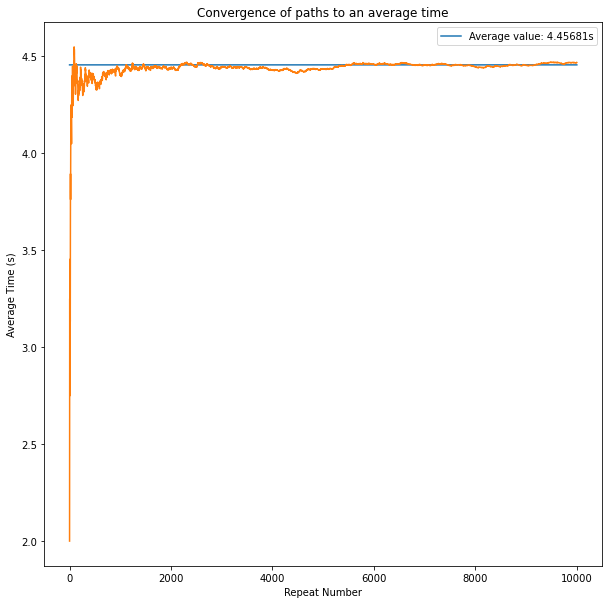

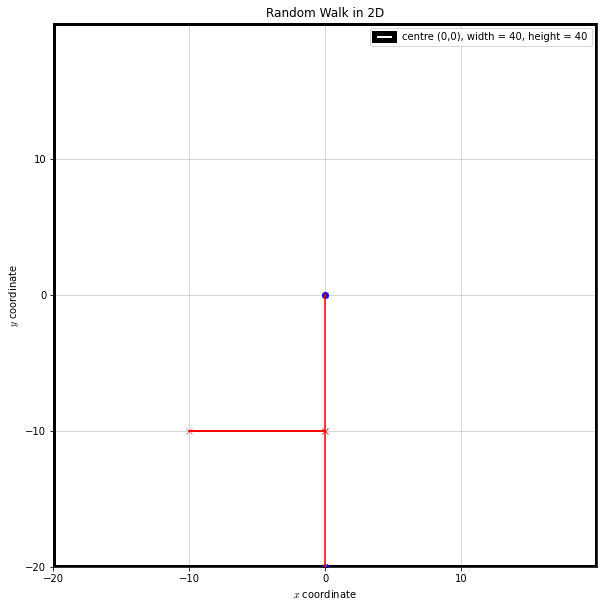

In [12]:
# Repeating timing of 2D random walk with default rectangular boundary to find average for many repeats
repeats = 10000     # number of walks to execute
max_N = int(1e6)    # maximum number of steps in a path

pos_array = np.zeros(repeats)
remainder_array = np.zeros(repeats)
# Generate 'repeats' number of paths and their associated remainders
for i in range(repeats):
    ticker(i,repeats)
    pos_array[i] = len(rectWalk(step_size=10,x_cent=0,y_cent=0,half_width=20,half_height=20,max_N=1e6)[0])-1
    remainder_array[i] = rectWalk(step_size=10,x_cent=0,y_cent=0,half_width=20,half_height=20,max_N=1e6)[1]

# Compute the average time of the repeats
timeManyWalks(pos_array,remainder_array,step_size,step_speed)

# Plot convergence to an average value of path execution time
avConvergence(step_size,step_speed,repeats)

# Rectangular boundary demonstration - default values
pos,remainder = rectWalk(step_size=10,x_cent=0,y_cent=0,half_width=20,half_height=20)
plotRandomWalk(pos)
plotRect(x_cent=0,y_cent=0,half_width=20,half_height=20) 
timeSingleWalk(pos,remainder,step_size,step_speed)

#### Results Discussion

The average time to reach the boundary often shows initial spike at low numbers of repeats, since early on in average process particularly long paths can easily skew average time. After further repeats, this value tends to the appropriate average.

### Rectangular Boundary – user-inputted values

Enter half width, a: 40
Enter half height, b: -23.4
This number is not positive.
Enter half height, b: 35.3
Enter x center: 0
Enter y center: 654
Ant starting outside of boundary.
Enter y center: 5
Enter step size: 10
  * * * * * * * * * *    -  100%  -     * * * * * * * * * *

On average (of 10000 repeats), ant reached boundary in 18.41321s after taking 18.6492 step(s) of size 10.0 unit(s) at a speed of 10.0 unit(s) per second.


Final average time: 18.95734s


Example ant reached boundary in 9.0s after taking 9 step(s) of size 10.0 unit(s) at a speed of 10.0 unit(s) per second.


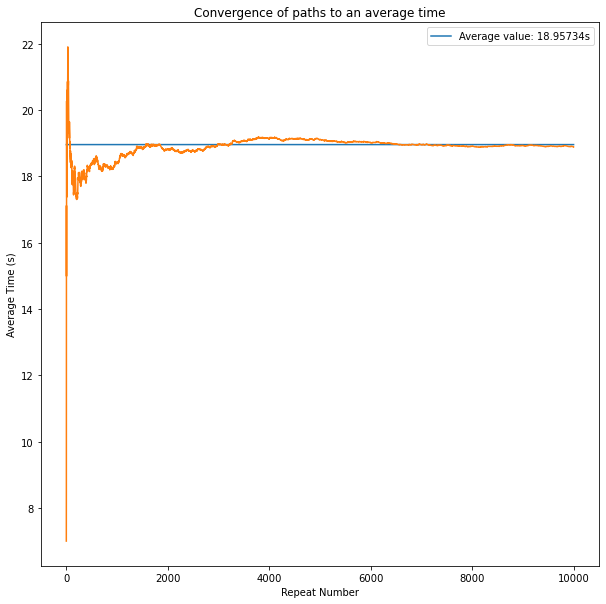

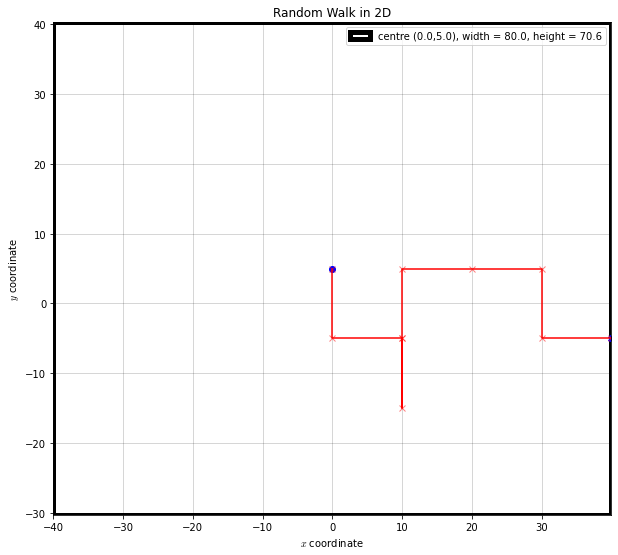

In [13]:
# Feel free to change these
repeats = 10000     # number of walks to execute
max_N = 1e6         # maximum number of steps in a single path
step_size = 10      # arbitrary units (a.u.) - could be cm as in challenge question
step_speed = 10     # in a.u. per second

x_cent,y_cent,half_width,half_height,step_size = ellipseRectInputting()
pos_array = np.zeros(repeats)
remainder_array = np.zeros(repeats)
# Generate 'repeats' number of paths and their associated remainders
for i in range(repeats):
    ticker(i,repeats)
    pos_array[i] = len(rectWalk(step_size,x_cent,y_cent,half_width,half_height,max_N)[0])-1
    remainder_array[i] = rectWalk(step_size,x_cent,y_cent,half_width,half_height,max_N)[1]

# Compute the average time of the repeats
timeManyWalks(pos_array,remainder_array,step_size,step_speed)

# Plot convergence to an average value of path execution time
avConvergence(step_size,step_speed,repeats)

# Demonstrate and time a single random walk
pos,remainder = rectWalk(step_size,x_cent,y_cent,half_width,half_height)
plotRandomWalk(pos)
plotRect(x_cent,y_cent,half_width,half_height)
timeSingleWalk(pos,remainder,step_size,step_speed)

### Linear Boundary – default values

  * * * * * * * * * *    -  100%  -     * * * * * * * * * *

On average (of 1000 repeats), ant reached boundary in 315.35800s after taking 315.358 step(s) of size 10.0 unit(s) at a speed of 10.0 unit(s) per second.


Final average time: 272.26027s


Example ant reached boundary in 1.0s after taking 1 step(s) of size 10 unit(s) at a speed of 10.0 unit(s) per second.


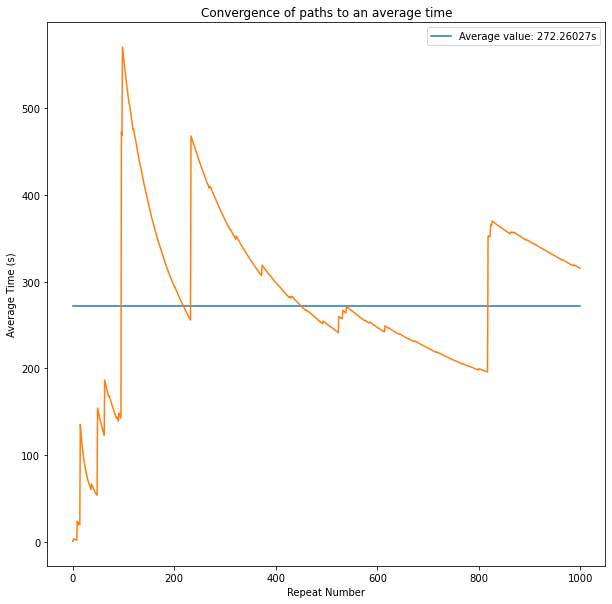

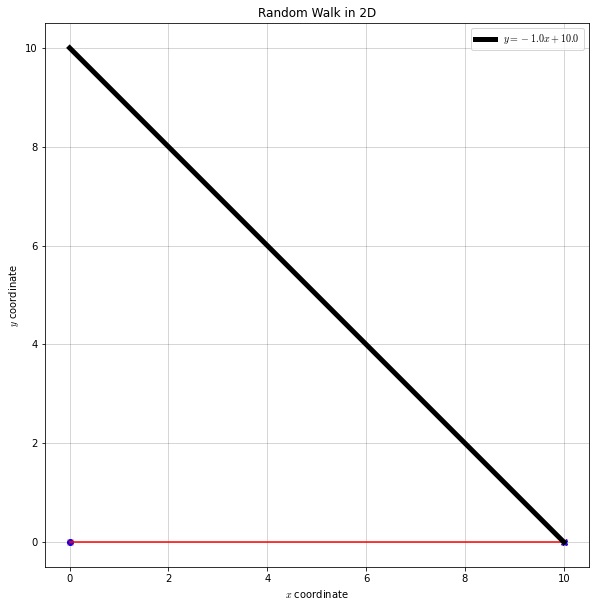

In [14]:
## Feel free to change this
repeats = 1000     # number of walks to execute. N.B. can take particularly long, since path is not enclosed.
max_N = int(1e6)   # maximum number of steps in a single path

pos_array = np.zeros(repeats)
remainder_array = np.zeros(repeats)
# Generate 'repeats' number of paths and their associated remainders

for i in range(repeats):
    ticker(i,repeats)
    pos_array[i] = len(lineWalk(point_1=[10,0],point_2=[0,10],origin_x=0,origin_y=0,max_N=1e6)[0])-1
    remainder_array[i] = lineWalk(point_1=[10,0],point_2=[0,10],origin_x=0,origin_y=0,max_N=1e6)[1]

# Compute the average time of the repeats
timeManyWalks(pos_array,remainder_array,step_size,step_speed)

# Plot convergence to an average value of path execution time
avConvergence(step_size,step_speed,repeats)

# Demonstrate and time a single§ random walk
pos,remainder=lineWalk(point_1=[10,0],point_2=[0,10])
plotRandomWalk(pos)
plotLine(pos,point_1=[10,0],point_2=[0,10])
timeSingleWalk(pos,remainder)

#### Results Discussion

Unlike rectangular and elliptical boundaries, linear boundaries mean that the ant is not surrounded by food. This can lead to some paths which completely diverge and never reach the food within the maximum allowed number of steps. If allowed infinite steps, the path would intersect the line with probability 1. However, for practicality's sake (I'm sure you've got better things to do), these paths are curtailed at this maximum number of steps. You can see the effect of these paths showing up as a sawtooth pattern in the graph showing convergence to an average time.

This behaviour can lead to some very skewed averages, long execution times, and makes the determination of a long-run average very difficult. I'd be fascinated to see whether there is an elegant way of getting round the problem, short of throwing a lot of processing power at it!

### Linear Boundary – user-inputted values

Enter x coordinate of first point on line: 30
Enter y coordinate of first point on line: 10
Enter x coordinate of second point on line: -10
Enter y coordinate of second point on line: 20
Enter x value of ant origin: 0
Enter y value of ant origin: 0
  - - - - - - - - - -    -  4%  -     - - - - - - - - - -
Silly ant! Took too long (more than 1000000 steps) to converge to food.
  * * - - - - - - - -    /  25%  \     - - - - - - - - * *
Silly ant! Took too long (more than 1000000 steps) to converge to food.
  * * * * - - - - - -    |  44%  |     - - - - - - * * * *
Silly ant! Took too long (more than 1000000 steps) to converge to food.
  * * * * * - - - - -    \  58%  /     - - - - - * * * * *
Silly ant! Took too long (more than 1000000 steps) to converge to food.
  * * * * * * * * - -    |  79%  |     - - * * * * * * * *
Silly ant! Took too long (more than 1000000 steps) to converge to food.
  * * * * * * * * - -    /  86%  \     - - * * * * * * * *
Silly ant! Took too long (more than 10

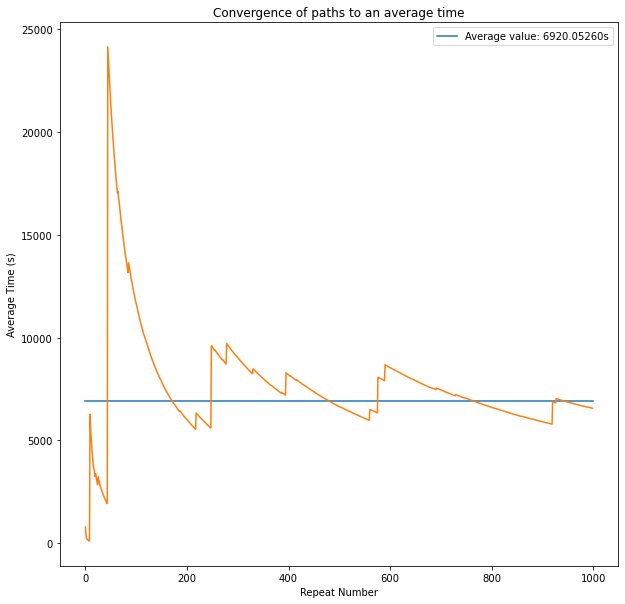

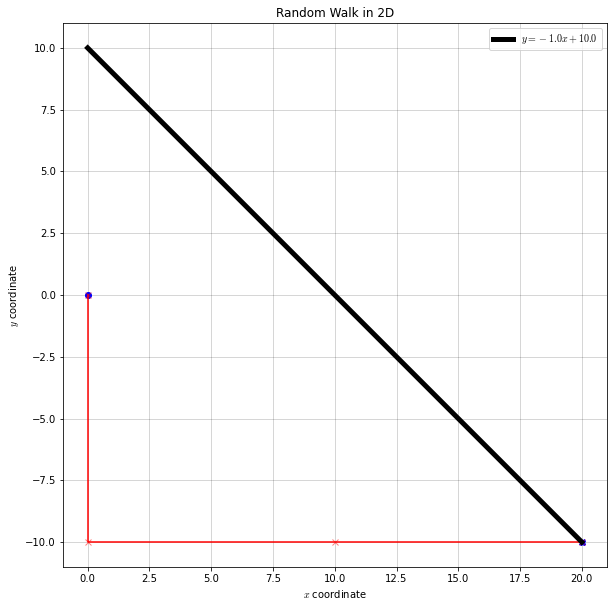

In [15]:
# Feel free to change these
repeats = 100     # number of walks to execute
max_N = 1e6       # maximum number of steps in a single path
step_size = 10    # arbitrary units (a.u.) - could be cm as in challenge question
step_speed = 10   # in a.u. per second

# Get user inputs for line equation and ant start position
point_1,point_2,origin_x,origin_y = lineInputting()
pos_array = np.zeros(repeats)
remainder_array = np.zeros(repeats)
# Generate 'repeats' number of paths and their associated remainders
for i in range(repeats):
    ticker(i,repeats)
    pos_array[i] = len(lineWalk(point_1,point_2,origin_x,origin_y,max_N)[0])-1
    remainder_array[i] = lineWalk(point_1,point_2,origin_x,origin_y,max_N)[1]

# Compute the average time of the repeats
timeManyWalks(pos_array,remainder_array,step_size,step_speed)

# Plot convergence to an average value of path execution time
avConvergence(step_size,step_speed,repeats)

# Demonstrate and time a single random walk
pos,remainder=lineWalk(point_1=[10,0],point_2=[0,10])
plotRandomWalk(pos)
plotLine(pos,point_1=[10,0],point_2=[0,10])
timeSingleWalk(pos,remainder,step_size,step_speed)

### Elliptical Boundary – default values

  - - - - - - - - - -    |  2%  |     - - - - - - - - - -

  * * * * * * * * * *    -  100%  -     * * * * * * * * * *

On average (of 10000 repeats), ant reached boundary in 12.65750s after taking 12.9733 step(s) of size 10 unit(s) at a speed of 10.0 unit(s) per second.


Final average time: 13.30681s


Example ant reached boundary in 7.9s after taking 8 step(s) of size 10 unit(s) at a speed of 10.0 unit(s) per second.


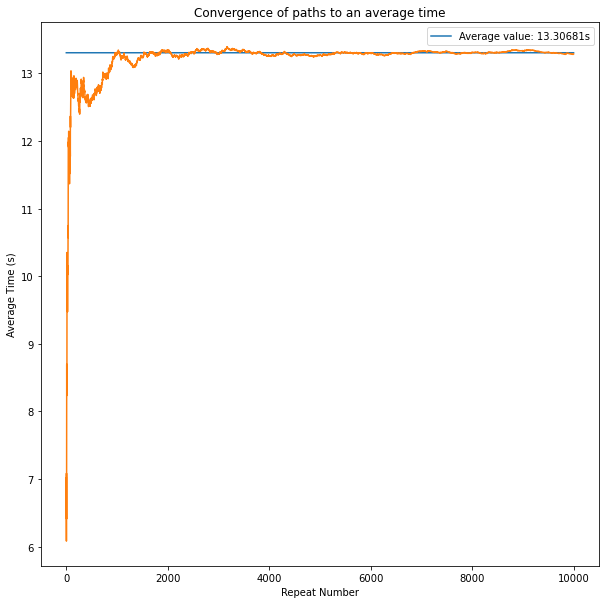

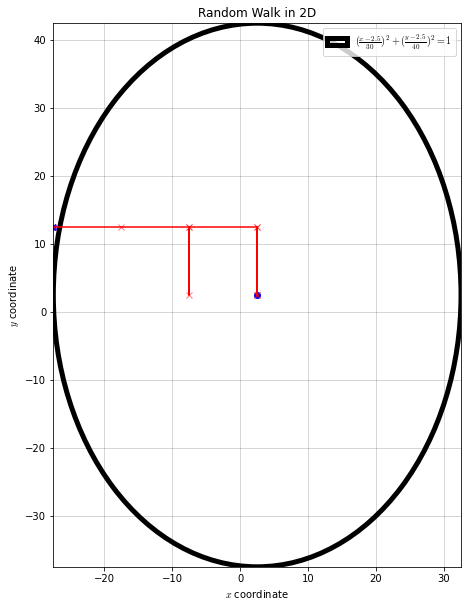

In [16]:
# Feel free to change this
repeats = 10000    # number of walks to execute

pos_array = np.zeros(repeats)
remainder_array = np.zeros(repeats)
# Generate 'repeats' number of paths and their associated remainders
for i in range(repeats):
    ticker(i,repeats)
    pos_array[i] = len(ellipseWalk()[0])-1
    remainder_array[i] = ellipseWalk()[1]

# Compute the average time of the repeats
timeManyWalks(pos_array,remainder_array,step_size,step_speed)

# Plot convergence to an average value of path execution time
avConvergence(step_size,step_speed,repeats)

# Demonstrate and time a single random walk
pos,remainder = ellipseWalk()
plotRandomWalk(pos)
plotEllipse()
timeSingleWalk(pos,remainder)

### Elliptical Boundary – user-inputted values

Enter half width, a: 60
Enter half height, b: 90
Enter x center: 0
Enter y center: 6
Enter step size: -01
This number is not positive.
Enter step size: 10
  * * * * * * * * * *    -  100%  -     * * * * * * * * * *

On average (of 10000 repeats), ant reached boundary in 52.42346s after taking 52.7014 step(s) of size 10.0 unit(s) at a speed of 10.0 unit(s) per second.


Final average time: 53.03002s


Example ant reached boundary in 136.5s after taking 137 step(s) of size 10.0 unit(s) at a speed of 10.0 unit(s) per second.


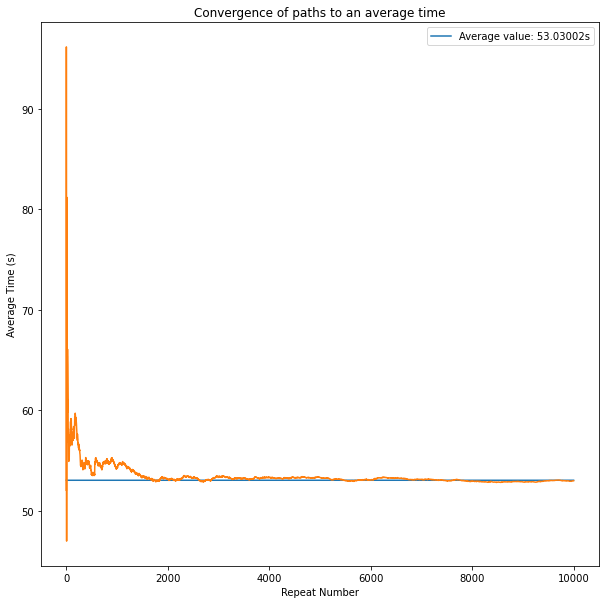

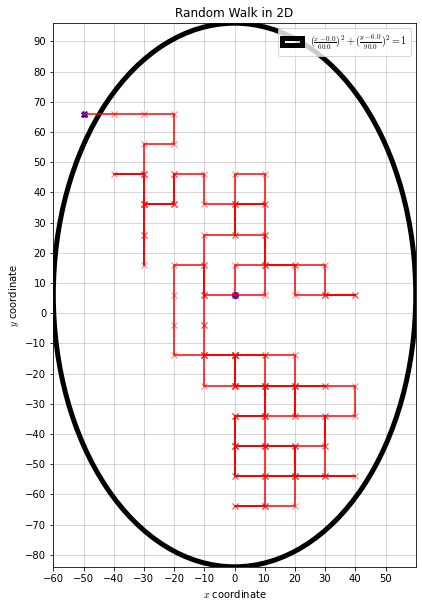

In [17]:
# Feel free to change these
repeats = 10000     # number of walks to execute
max_N = int(1e6)    # maximum number of loop executions
step_size = 10      # arbitrary units (a.u.) - could be cm as in challenge question
step_speed = 10     # in a.u. per second

# Get user inputs for line equation and ant start position
x_cent,y_cent,half_width,half_height,step_size = ellipseRectInputting()
pos_array = np.zeros(repeats)
remainder_array = np.zeros(repeats)
# Generate 'repeats' number of paths and their associated remainders
for i in range(repeats):
    ticker(i,repeats)
    pos_array[i] = len(ellipseWalk(step_size,x_cent,y_cent,half_width,half_height,max_N)[0])-1
    remainder_array[i] = ellipseWalk(step_size,x_cent,y_cent,half_width,half_height,max_N)[1]

# Compute the average time of the repeats
timeManyWalks(pos_array,remainder_array,step_size,step_speed)

# Plot convergence to an average value of path execution time
avConvergence(step_size,step_speed,repeats)

# Demonstrate and time a single random walk
pos,remainder = ellipseWalk(step_size,x_cent,y_cent,half_width,half_height)
plotRandomWalk(pos)
plotEllipse(x_cent,y_cent,half_width,half_height)
timeSingleWalk(pos,remainder,step_size,step_speed)

### Custom Image Searching

In [28]:
# =============================================================================
# CUSTOM IMAGE PROCESSING FUNCTIONS
# =============================================================================

def readImage():
    '''Reads in image. Ensures .png format. Example image available for download from GitHub repository!'''
     
    Response = 0
    while Response == 0:            # keep giving input option until user and program are happy
        path = input('\nPlease enter the file path to your image (ending .png): ')        # enter directory path
        repeat = '\nYou have chosen: {}'.format(path) + '\nIs this path correct? (y/n): ' # check if path is correct
        while path[-4:] != '.png':  # ensures image format is .png 
            #repeat = 'n'
            print('Image format must be .png please.')
            path = input('\nPlease enter the file path to your image (ending .png): ')
        Response = yesno(repeat)    # updates Response
    
    img = np.asarray(PIL.Image.open(path))[:,:,0]
    
    bi_array = np.where(img!=255, 255, 0)    # discriminate by threshold value (non-white = 1, white = 0)
    bi_array = np.pad(bi_array,50)        # pad array to avoid stepping out of it
    
    return bi_array


def imageInfo(bi_array):
    '''Gets user input for step size, movement speed, and origin.'''
    
    # display image dimension information 
    rows,columns = np.shape(bi_array)
    print('Image dimensions: {} rows by {} columns.'.format(rows,columns))
    
    # visualises image dimensions
    print('''
    y   o o o o o o o o o o o o o o
        o o o o o o o o o o o o o o
    0   o o o o o o o o o o o o o o
    |   o o o o o o o o o o o o o o
    v   o o o o o o o o o o o o o o
    
    x  0 ->
    ''')
    
    origin_x = posint('Enter the x coordinate of the origin: ')
    while origin_x >= columns:
        print('That would start the ant outside of the image.')
        origin_x = posint('Enter the x coordinate of the origin: ')
    origin_y = posint('Enter the y coordinate of the origin: ')
    while origin_y >= rows:
        print('That would start the ant outside of the image.')
        origin_y = posint('Enter the y coordinate of the origin: ')
    # inputs
    step_size = posint('\nEnter the step size (in pixels): ')
    while step_size > 50:   #could update to a percentage of image
        print('Step size too large (> 50)')
        step_size = posint('Enter a smaller step size (in pixels): ')
    speed = posint('Enter the ant speed (in pixels per second): ')
    
    return step_size,speed,origin_x,origin_y


def findFoodFromImage(bi_array,origin_x,origin_y,step_size,max_N):
    '''Ant does a random walk until it reaches food, or takes 'max_N' number 
    of steps'''
    
    rows,columns = np.shape(bi_array)
    pos = [[origin_x,origin_y]]
    
    # initialise check functions
    path_val = 0
    tick = 0
    while path_val == 0 and tick <= max_N:
        tick += 1
        
        x_start = pos[-1][0]                    # step start co-ordinates
        y_start = pos[-1][1]
        pos,direction = step2D(pos,step_size)   # take step
        x_end = pos[-1][0]                      # step end co-ordinates    
        y_end = pos[-1][1]
        
        if x_end<0 or x_end>columns or y_end<0 or y_end>rows:
            print('''\nThis ant didn\'t find food before exiting the field.
    Check your enclosed boundary!''')
            break
    
        if direction == 'horizontal':
            if x_start<x_end:
                path_array = bi_array[y_end,x_start:x_end-1]  # check if path intersected food
            else:
                path_array = bi_array[y_end,x_end-1:x_start]
        elif direction == 'vertical':
            if y_start<y_end:
                path_array = bi_array[y_start:y_end-1,x_end]
            else:
                path_array = bi_array[y_end-1:y_start,x_end]
         
        path_val = path_array.sum()                     # sum = 0 for no food, sum > 0 for food
    
    if tick > max_N or x_end<0 or x_end>columns or y_end<0 or y_end>rows:
        print('''The ant didn\'t find food within {} steps.
    Try adjusting your step size or ensuring the food boundary is closed.'''.format(tick))
        remainder = 0
    else:
        remainder = np.where(path_array == 255)[0][0]     # step overshoot
    
    return pos,remainder

#### Discussion of Results

With the complete freedom to choose png images, there is a lot of potential for the greyscaling process to produce unexpected artifacts. It would be simple to isolate blocks of colour containing fewer than a certain number of pixels and erase them.


Please enter the file path to your image (ending .png): /Users/orlandotimmerman/Desktop/optiver_logo.png

You have chosen: /Users/orlandotimmerman/Desktop/optiver_logo.png
Is this path correct? (y/n): y
Image dimensions: 500 rows by 700 columns.

    y   o o o o o o o o o o o o o o
        o o o o o o o o o o o o o o
    0   o o o o o o o o o o o o o o
    |   o o o o o o o o o o o o o o
    v   o o o o o o o o o o o o o o
    
    x  0 ->
    
Enter the x coordinate of the origin: 500
Enter the y coordinate of the origin: 260

Enter the step size (in pixels): 10
Enter the ant speed (in pixels per second): 10


<IPython.core.display.Javascript object>


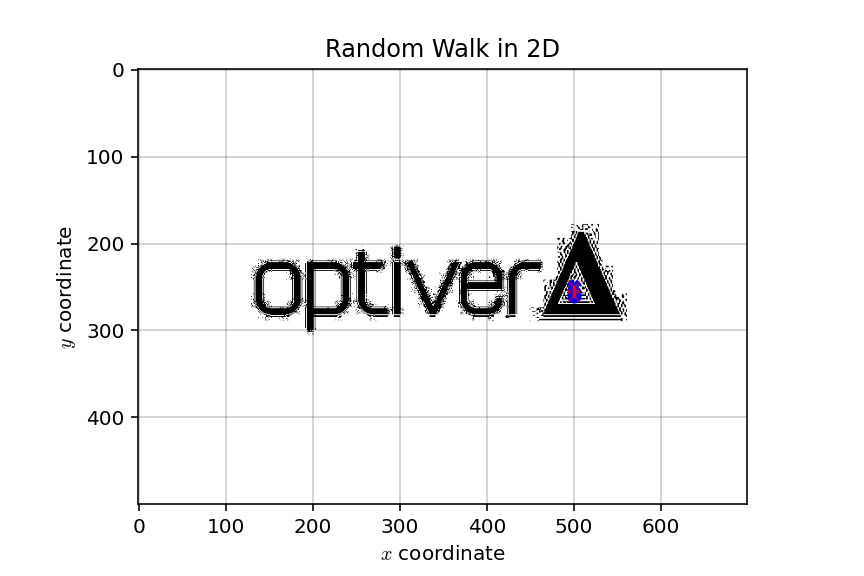



Example ant reached boundary in 0.7s after taking 1 step(s) of size 10 unit(s) at a speed of 10.0 unit(s) per second.


In [29]:
# Feel free to change this
max_N = int(1e6) # maximum number of steps taken before program quits

bi_array = readImage() # returns a binary array of the selected png file
step_size,step_speed,origin_x,origin_y = imageInfo(bi_array) # user-inputted step size, speed, and origin
pos,remainder = findFoodFromImage(bi_array,origin_x,origin_y,step_size,max_N) # carries out food search
plotRandomWalk(pos)    # plots random walk 
plt.imshow(bi_array,cmap='Greys') # superimposes original image on plotted walk
timeSingleWalk(pos,remainder,step_size,step_speed)

<IPython.core.display.Javascript object>


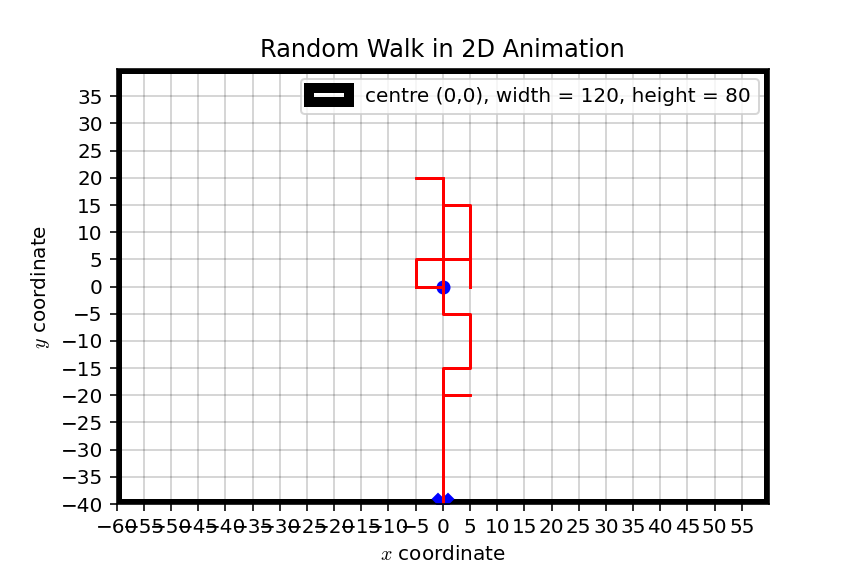

In [30]:
# animate result (as an example)
%matplotlib notebook

step_size = 5
x_cent = 0
y_cent = 0
half_width = 60
half_height = 40

# generate path from default ellipse boundary
pos,remainder = rectWalk(step_size,x_cent,y_cent,half_width,half_height)

# load figure
plt.close()
fig = plt.figure()
ax = plt.axes(xlim=(-100,100),ylim=(-100,100))

# format figure
plt.rcParams['mathtext.fontset'] = 'cm'     # getting nice mathematical notation
ax.set_xlabel(r'$x$ coordinate')            # labelling axes
ax.set_ylabel(r'$y$ coordinate')
ax.set_title('Random Walk in 2D Animation')           # title
ax.set_aspect('equal',adjustable='box')     # equal axes to get true shapes
ax.grid(True,which='both',color='k',alpha=0.2)    
  
# obtain start and end co-ordinates, plot marker at both
xs, ys = np.array(pos).T
start = (xs[0],ys[0])
end = (xs[-1],ys[-1])
ax.plot(start[0],start[1],marker='o',c='b')     # plot marker at beginning
ax.plot(end[0],end[1],marker='X',c='b',markersize=10)         # and end of path

line, = ax.plot([],[],c='red')
x_data, y_data = [], [] 

# overlay rectangle image
plotRect(x_cent,y_cent,half_width,half_height)
   
def init():
    '''Initialises first frame of animation'''
    
    line.set_data([],[])
    return line,
  
def animated(frames):
    '''Animates example 2d random walk'''
    
    x_val = pos[frames][0] # extracts x value of current coordinate
    y_val = pos[frames][1] # extracts y value of current coordinate
    
    # add to lists of coordinates
    x_data.append(x_val)
    y_data.append(y_val)
    
    # sets data of line class
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    return line,

# executes animation
anim = animation.FuncAnimation(fig,animated,
                               frames = len(pos),
                               interval = 50,
                               blit = True,
                               repeat = False)


### Extension Proposals

I've had a great time going beyond the challenge description. There are many possibilities for more extensions!
- Provide statistics on how close the ant came to boundary for those which didn't make it to food! Also point out how many didn't reach it, and provide a statistical approximation to how much this would contribute to the average time taken.
- Have dynamic food (disappears after eating, or perhaps moves on its own random walk). This would involve classes, and some measure of proximity between the objects at each step (checking whether the ant is within the radius of the food blob).
- Add a custom equation input rather than just inputting two points to define a straight line.

I'd be open to any further feedback – I'm always looking to improve the efficiency and capability of my code.